Calculating the range of Electrons in Al
Source: 

https://doi.org/10.1016/0029-554X(63)90196-4

"Eine einfache reichweite-energie-beziehung für elektronen im energiebereich von 3 keV bis 3 MeV"
K-H. Weber, Nucl. Instr. and Methods, vol 25, 1964, Pages 261-264

In [168]:
from sklearn.linear_model import LinearRegression

In [169]:
def Range(A,B,C,E):
  return A*E*(1-B/(1+C*E))

In [170]:
a=1.479*0.001
B=0.9852
C=3.73
A=1/a

In [171]:
import numpy as np
energie = np.linspace(0.001,3,100)


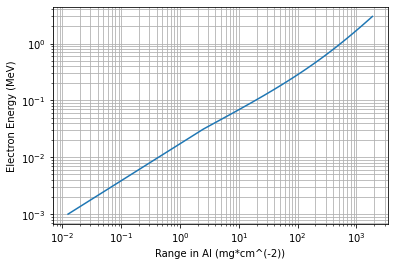

In [172]:
import matplotlib.pyplot as plt
plt.loglog(Range(A,B,C,energie),energie)
plt.grid(True, which="both", ls="-")
plt.ylabel("Electron Energy (MeV)")
plt.xlabel("Range in Al (mg*cm^(-2))")
plt.show()

In [173]:
Range(A,B,C,0.1)

19.09717349028669

In [174]:
def lin(x,y):
    x = x.reshape(-1, 1)  # reshape in 2D-Array for sklearn
    model = LinearRegression()
    model.fit(x, y)
    
    return model

Plateau auf y= [4914.19136961]


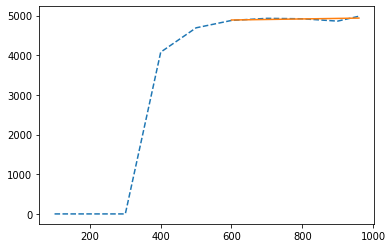

In [ ]:
x = np.array([100,200,300,400,500,600,700,800,900,960])
y= np.array([0,0,0,4080,4693,4879,4932,4921,4862,4985])

index=5
lin_x = (x[index:]).reshape(-1,1)
model=  lin(lin_x,y[index:])
lin_y=model.predict(lin_x)
plt.xlabel('sbjhk')
plt.plot(x,y,'--')
plt.plot(lin_x,lin_y)

mitte = model.intercept_+ model.coef_[0]*(lin_x[0]+lin_x[-1])/2
print('Plateau auf y=',mitte)
#plt.axhline(y=mitte,c='red')

In [176]:
x_mm =[0.0, 0.025, 0.05, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.35, 0.4]
epsilon = 0.0018
rho_Al_x = [2.69*x*1000 for x in x_mm]
N = [5005, 3124, 2018, 1115, 739, 469, 346, 191, 116, 78, 49, 42, 26, 21]
N_bg= 67
N_eff = [x-N_bg for x in N]
t=60



A= []
for i in range(len(N)):
    A.append((N[i]-N_bg) / (t*epsilon))


rho_Al_x

[0.0,
 67.25,
 134.5,
 269.0,
 336.25,
 403.49999999999994,
 470.74999999999994,
 538.0,
 605.25,
 672.5,
 739.75,
 806.9999999999999,
 941.4999999999999,
 1076.0]

gradient -17.203265781827508


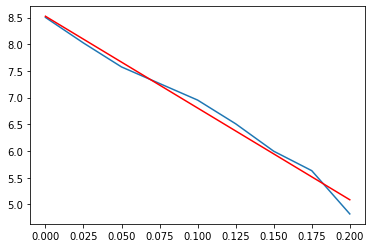

In [182]:
import math

# Logarithmus von 100 zur Basis 10 (sollte 2 sein)
#print(math.log(, 2)) 

x_mm=x_mm[:8]
x_mm=np.array(x_mm).reshape(-1, 1)
N_eff_log = [math.log(x, math.e) for x in N_eff[:8]]

model=  lin(np.array(x_mm[:10]),N_eff_log)


plt.plot(x_mm,N_eff_log)
plt.plot(x_mm,model.predict(x_mm),c='r')
print('gradient',model.coef_[0])